In [49]:
#importingLibraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [50]:
#loadingData
df=pd.read_csv("loanstatus.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [51]:
#checking shape
df.shape

(614, 13)

In [52]:
#droping load_id 
df.drop("Loan_ID",axis=1,inplace=True)

In [53]:
#checking for dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [54]:
#checking for unique values in each columns
df.apply(lambda x:len(x.unique()))

Gender                 3
Married                3
Dependents             5
Education              2
Self_Employed          3
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

In [55]:
#checking for null values
df.isnull().sum()


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [56]:
#removing null values wit mode
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [57]:
#checking for null values
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [58]:
#extracting object type
cat=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="object":
        cat.append(x)

In [59]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [60]:
#checking the value couts in all the object type variable
for col in cat:
    print(col)
    print(df[col].value_counts())
    print()

Gender
Male      502
Female    112
Name: Gender, dtype: int64

Married
Yes    401
No     213
Name: Married, dtype: int64

Dependents
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Self_Employed
No     532
Yes     82
Name: Self_Employed, dtype: int64

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64



<AxesSubplot:xlabel='Gender', ylabel='count'>

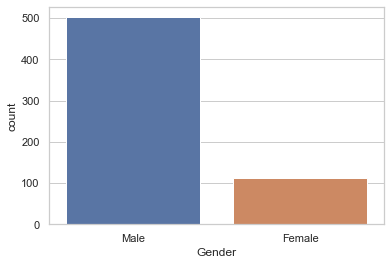

In [61]:
#Gender
sns.countplot("Gender", data=df)

In [62]:
#the number of male applied for load is far more than female

<AxesSubplot:xlabel='Married', ylabel='count'>

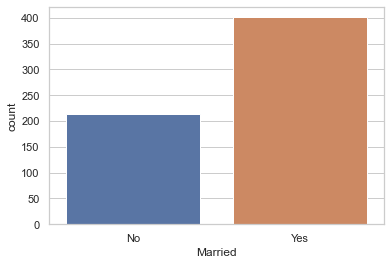

In [63]:
#Married
sns.countplot("Married", data=df)

In [64]:
#the chances of married people applying for the mode is more in comparison to unmarried people

<AxesSubplot:xlabel='Dependents', ylabel='count'>

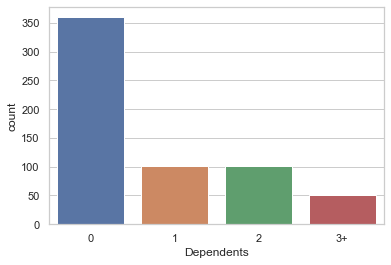

In [65]:
#Dependents
sns.countplot("Dependents", data=df)

In [66]:
#people are great in numbers who has no dependents with them

<AxesSubplot:xlabel='Education', ylabel='count'>

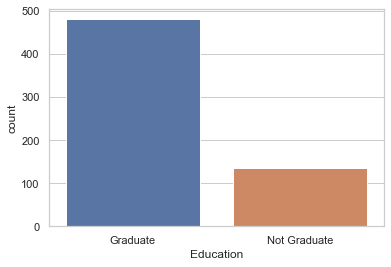

In [67]:
#Education
sns.countplot("Education", data=df)

In [68]:
#people who are graduate is more in numbers

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

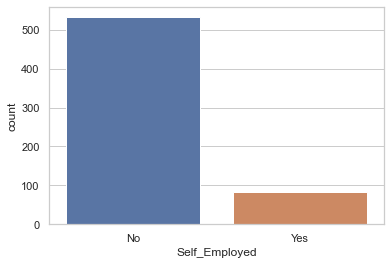

In [69]:
#self employed
sns.countplot("Self_Employed", data=df)

In [70]:
#very few peple are self employed majority of them is in jobs  

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

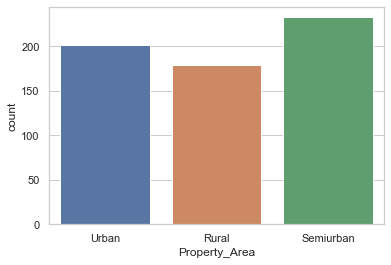

In [71]:
#property area
sns.countplot("Property_Area", data=df)

In [72]:
#the data is eually distributed for all the category 

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

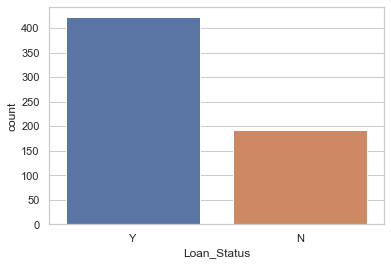

In [73]:
#loan_staus 
sns.countplot("Loan_Status", data=df)

In [74]:
#there is huge number of  approved case in comparison of rejection

In [75]:
#craeting a histogram function
def histogram(data_frame,feature_name):
    plt.figure(figsize=(10,6))
    sns.set(style = "whitegrid")
    sns.distplot(data_frame[feature_name],kde=True)

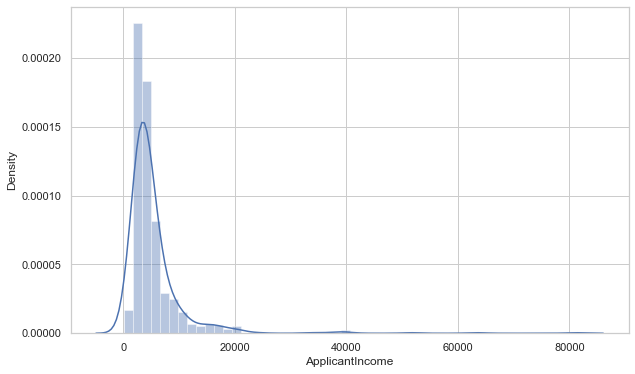

In [76]:
#item ApplicantInccome
histogram(df,"ApplicantIncome")

In [77]:
#the data is highly right skewd also it contains outliers

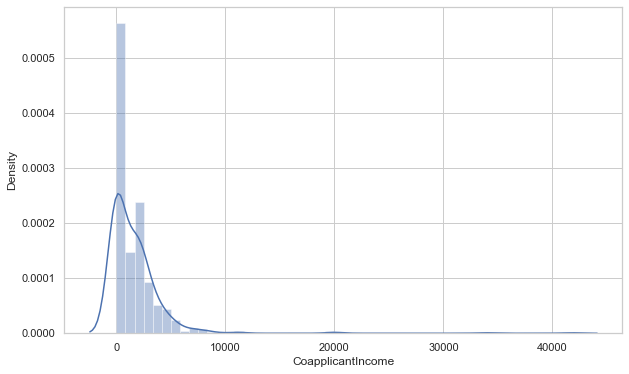

In [78]:
#CoapplicantIncome
histogram(df,"CoapplicantIncome")

In [79]:
#the data is highly right skewd also it contains outliers
#many coapplicant has incoem zero

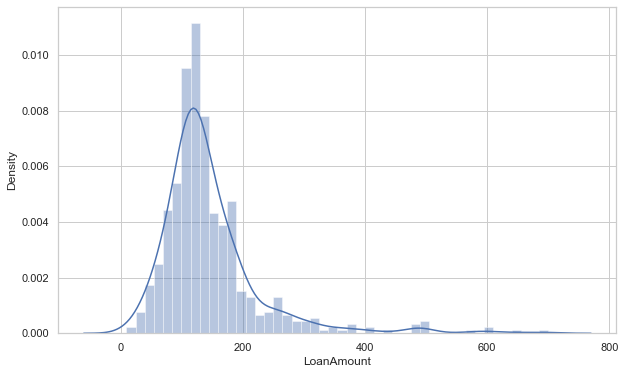

In [80]:
#loanAmount
histogram(df,"LoanAmount")

In [81]:
#the data is highly right skewd also it contains outliers
#the most asked loan amount is around 100k

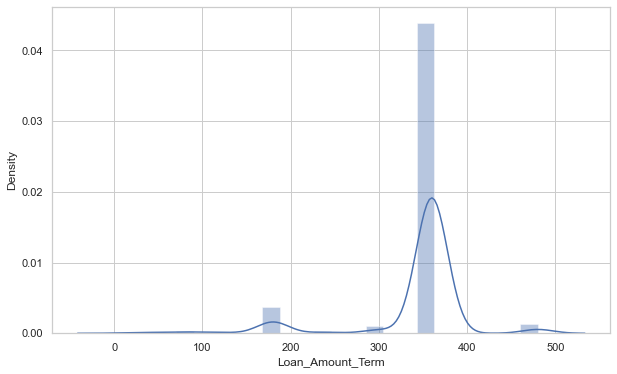

In [82]:
#loan_amount_term
histogram(df,"Loan_Amount_Term")

In [83]:
#majority of people wants there tenure of 350 months ad the data ranges from 180 to 480

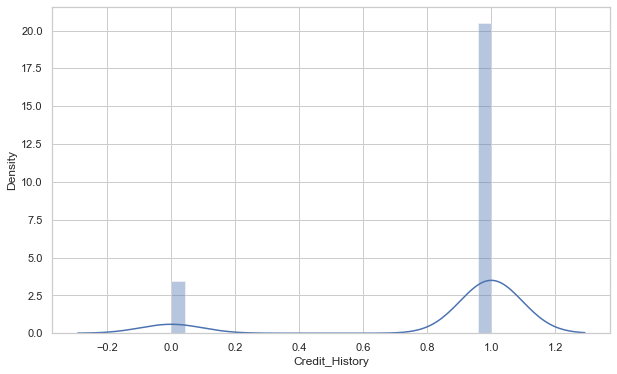

In [84]:
# Credit_history
histogram(df,"Credit_History")

<AxesSubplot:xlabel='Gender', ylabel='count'>

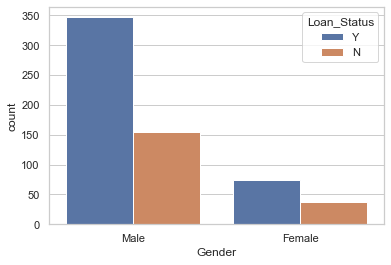

In [85]:
#Gender/Loan_status
sns.countplot("Gender", data=df, hue="Loan_Status")

In [86]:
#as male applicants are more in number there rejection rate is also more than female

<AxesSubplot:xlabel='Married', ylabel='count'>

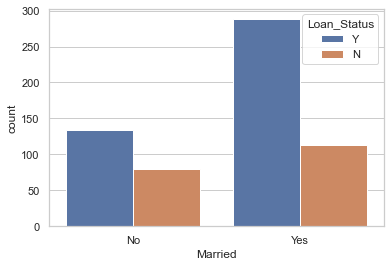

In [87]:
#married/loan_status
sns.countplot("Married", data=df, hue="Loan_Status")

In [88]:
#the approval rate of married people is more than unmarried people 

<AxesSubplot:xlabel='Dependents', ylabel='count'>

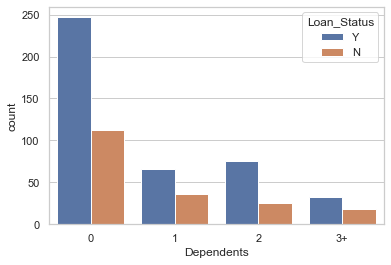

In [89]:
#Dependents/Loan_status
sns.countplot("Dependents", data=df, hue="Loan_Status")

In [90]:
#the data is similar for all categories of approval and rejection of loan it is decreassing as the number of dependents is increasing

<AxesSubplot:xlabel='Education', ylabel='count'>

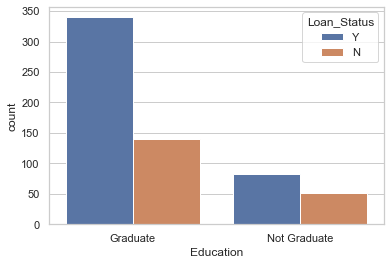

In [91]:
#education/loan_status
sns.countplot("Education", data=df, hue="Loan_Status")

In [92]:
#people with graducation are more inclined towards getting a loan

In [93]:
#data processing
#labeling the categorical values by label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"].values)
df["Married"]=le.fit_transform(df["Married"].values)
df["Dependents"]=le.fit_transform(df["Dependents"].values)
df["Education"]=le.fit_transform(df["Education"].values)
df["Self_Employed"]=le.fit_transform(df["Self_Employed"].values)
df["Property_Area"]=le.fit_transform(df["Property_Area"].values)
df["Loan_Status"]=le.fit_transform(df["Loan_Status"].values)


In [94]:
#checking the coffecient
cor=df.corr()

<AxesSubplot:>

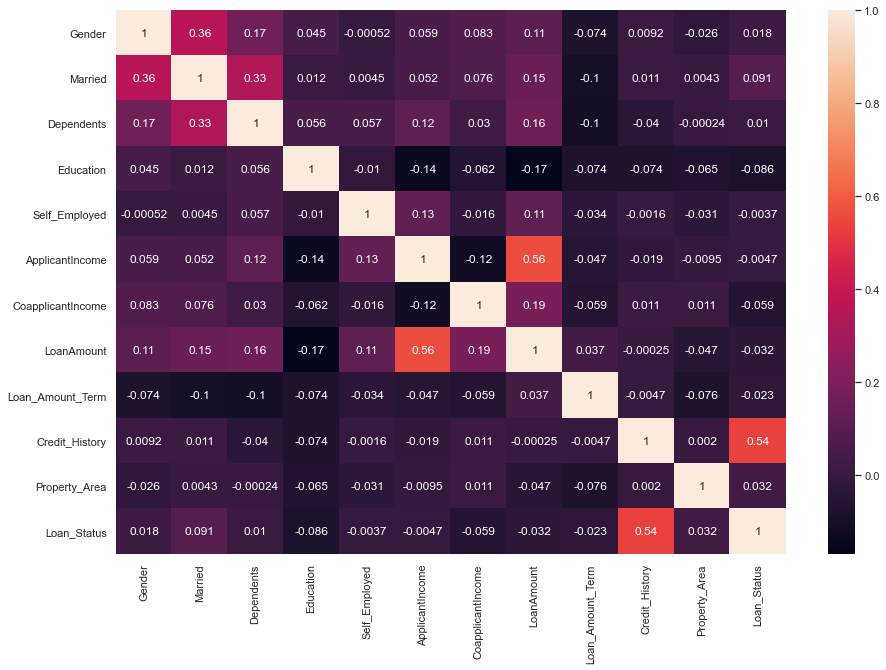

In [95]:
#using heatmap 
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True)

In [96]:
#the loan status is more correlated with credit history 
#the loan_status most negetively correlatd with education

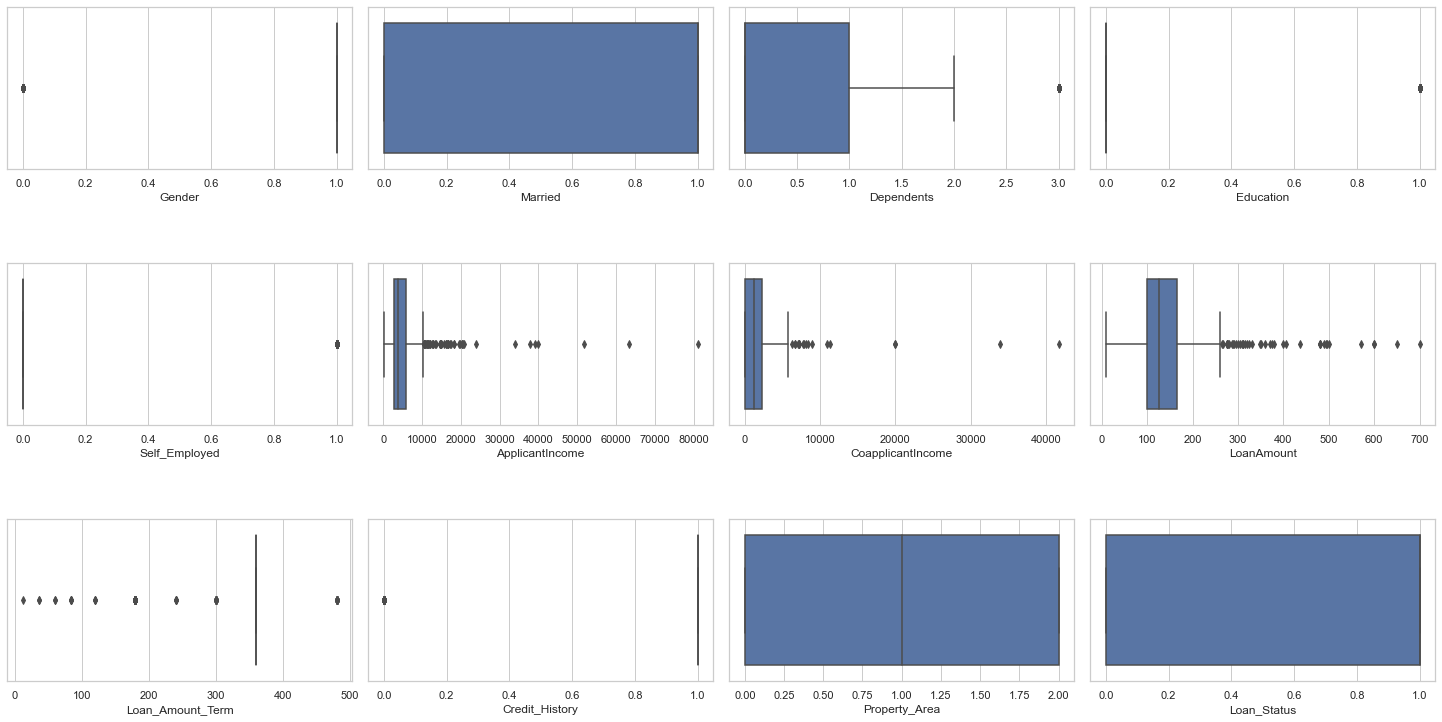

In [97]:
#ploting boxplot to check oultiers
fig, ax=plt.subplots(ncols=4,nrows=3, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col != "type":
        sns.boxplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [98]:
#function to apply IQR
#Also there can be no negative value so the lower bridge is replaced with 25th percentile for the number =<0
def outlier_IQR(data_frame,feature_name):
    histogram(data_frame,feature_name)
    IQR = data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25)
    upper_bridge = data_frame[feature_name].quantile(0.75)+(IQR*1.5)
    df.loc[data_frame[feature_name]>=upper_bridge,feature_name]=upper_bridge
    df.loc[data_frame[feature_name]<=0,feature_name]=lower_bridge
    histogram(data_frame,feature_name)

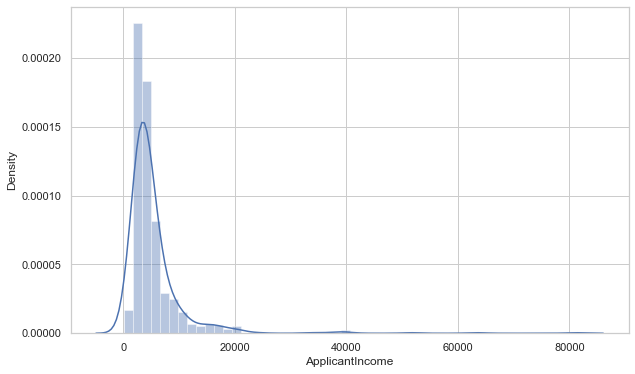

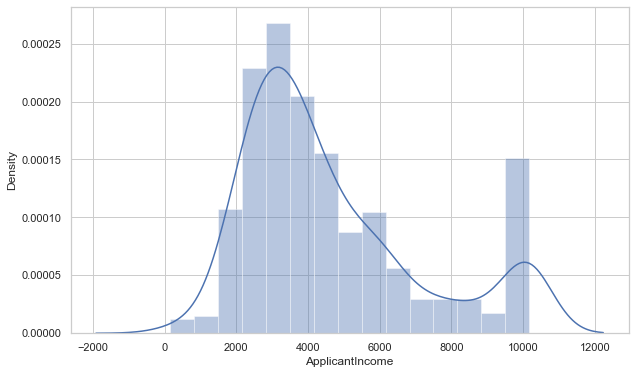

In [99]:
#MonthlyIncome
outlier_IQR(df,"ApplicantIncome")

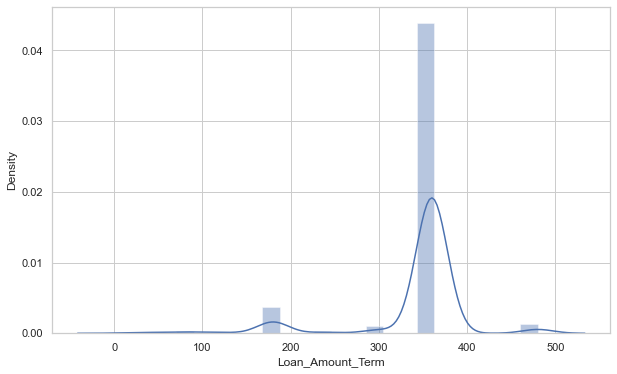

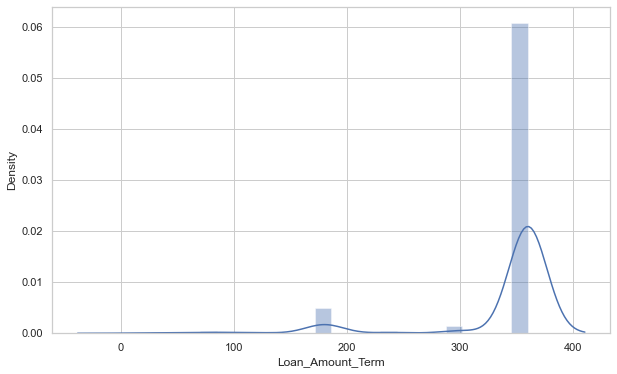

In [100]:
#MonthlyIncome
outlier_IQR(df,"Loan_Amount_Term")

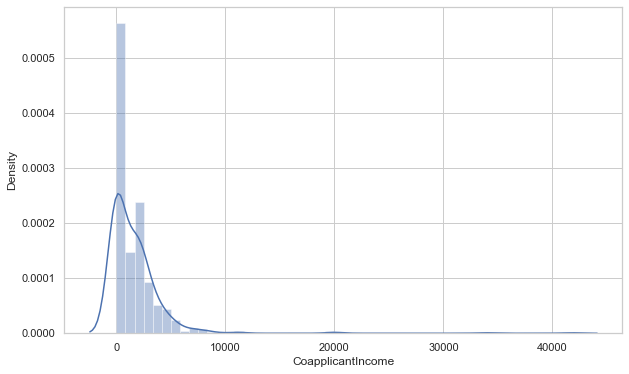

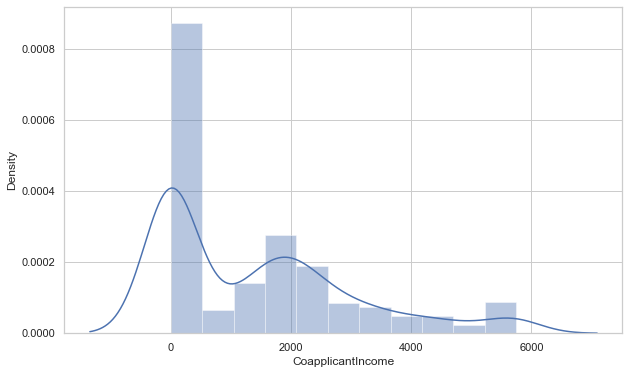

In [101]:
#MonthlyIncome
outlier_IQR(df,"CoapplicantIncome")

In [102]:
#checking for skewness
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      1.039846
CoapplicantIncome    1.012763
LoanAmount           2.745407
Loan_Amount_Term    -3.009477
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [103]:
#spliting data in x and y
x=df.drop("Loan_Status", axis=1)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849.0,0.0,120.0,360.0,1.0,2
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106.0,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072.0,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583.0,0.0,187.0,360.0,1.0,2


In [104]:
y=df["Loan_Status"]
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [105]:
#treating skewness with power transform
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)
#checking for skewness
df_new.skew()

Gender              -1.648795
Married             -0.644850
Dependents           0.441404
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.035649
CoapplicantIncome   -0.164920
LoanAmount           0.018936
Loan_Amount_Term    -2.376414
Credit_History      -2.021971
Property_Area       -0.158267
dtype: float64

In [106]:
x=df_new

In [107]:
#importing libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

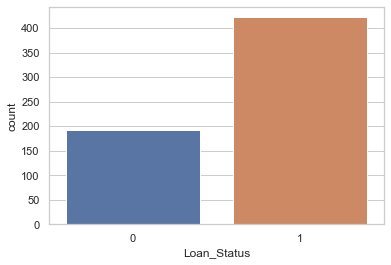

In [108]:
#the dependent varible is unbalenced
sns.countplot(y)

In [109]:
#using upsampling to balance the data
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
#data transformation
x,y = oversample.fit_resample(x,y)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

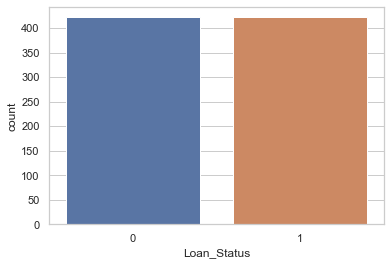

In [110]:
#balanced data
sns.countplot(y)

In [111]:
#spliting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=56)

In [112]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((590, 11), (254, 11), (590,), (254,))

In [113]:
# function to train, test and performance check 
def model(name):
    model=name()
    model.fit(x_train,y_train)
    predict=model.predict(x_test)
    print("""The classification report is:
    """,classification_report(y_test, predict))
       
    print("The accuracy score is: ", accuracy_score(y_test,predict))
    
    
    print("""The confusion matrix is:
    
    """,confusion_matrix(y_test,predict))

In [114]:
#DecisionTreeClassifier
model(DecisionTreeClassifier)

The classification report is:
                   precision    recall  f1-score   support

           0       0.73      0.74      0.73       127
           1       0.74      0.72      0.73       127

    accuracy                           0.73       254
   macro avg       0.73      0.73      0.73       254
weighted avg       0.73      0.73      0.73       254

The accuracy score is:  0.7322834645669292
The confusion matrix is:
    
     [[94 33]
 [35 92]]


In [115]:
print(cross_val_score(DecisionTreeClassifier(),x,y,cv=5).mean())

0.7523316427162582


In [116]:
#RandomForestClassifier
model(RandomForestClassifier)

The classification report is:
                   precision    recall  f1-score   support

           0       0.87      0.76      0.81       127
           1       0.78      0.89      0.83       127

    accuracy                           0.82       254
   macro avg       0.83      0.82      0.82       254
weighted avg       0.83      0.82      0.82       254

The accuracy score is:  0.8228346456692913
The confusion matrix is:
    
     [[ 96  31]
 [ 14 113]]


In [117]:
print(cross_val_score(RandomForestClassifier(),x,y,cv=5).mean())

0.8152296421527192


In [118]:
#SVC
model(SVC)

The classification report is:
                   precision    recall  f1-score   support

           0       0.78      0.63      0.70       127
           1       0.69      0.82      0.75       127

    accuracy                           0.72       254
   macro avg       0.73      0.72      0.72       254
weighted avg       0.73      0.72      0.72       254

The accuracy score is:  0.7244094488188977
The confusion matrix is:
    
     [[ 80  47]
 [ 23 104]]


In [119]:
print(cross_val_score(SVC(),x,y,cv=5).mean())

0.7310650887573964


In [120]:
#Naive Bayes
model(GaussianNB)

The classification report is:
                   precision    recall  f1-score   support

           0       0.94      0.39      0.56       127
           1       0.62      0.98      0.76       127

    accuracy                           0.69       254
   macro avg       0.78      0.69      0.66       254
weighted avg       0.78      0.69      0.66       254

The accuracy score is:  0.6850393700787402
The confusion matrix is:
    
     [[ 50  77]
 [  3 124]]


In [121]:
print(cross_val_score(GaussianNB(),x,y,cv=5).mean())

0.699020850943928


In [122]:
#KNeighborsClassifier
model(KNeighborsClassifier)

The classification report is:
                   precision    recall  f1-score   support

           0       0.71      0.78      0.74       127
           1       0.75      0.68      0.71       127

    accuracy                           0.73       254
   macro avg       0.73      0.73      0.73       254
weighted avg       0.73      0.73      0.73       254

The accuracy score is:  0.7283464566929134
The confusion matrix is:
    
     [[99 28]
 [41 86]]


In [123]:
print(cross_val_score(KNeighborsClassifier(),x,y,cv=5).mean())

0.7334319526627219


In [124]:
#the difference between accuracy score and cross val score of randomtreesclassifier was minimum and the value was maximum among other models
#randomforestclassfier is our best model

In [125]:
#setting parameter for hyperparameter tunning
parameter = {
    'max_depth': np.arange(2,10),
    'criterion':['gini', 'entropy'],
    'max_features':['auto','sqrt', 'log2'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': np.arange(2,10)
              }

In [126]:
#using GridSearchCV for Hyper parameter tunning
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [127]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [128]:
#checking best parameters
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 7}

In [163]:
best_model=RandomForestClassifier(criterion="gini",max_depth=7,min_samples_leaf=4,min_samples_split=10,n_estimators=5,max_features="sqrt")
best_model.fit(x_train,y_train)
pred=best_model.predict(x_test)
print("""The classification report is:
    """,classification_report(y_test, pred))
       
print("The accuracy score is: ", accuracy_score(y_test,pred))
    
    
print("""The confusion matrix is:
    
    """,confusion_matrix(y_test,pred))

The classification report is:
                   precision    recall  f1-score   support

           0       0.84      0.76      0.80       127
           1       0.78      0.86      0.82       127

    accuracy                           0.81       254
   macro avg       0.81      0.81      0.81       254
weighted avg       0.81      0.81      0.81       254

The accuracy score is:  0.8110236220472441
The confusion matrix is:
    
     [[ 97  30]
 [ 18 109]]


In [130]:
#auc_roc curve

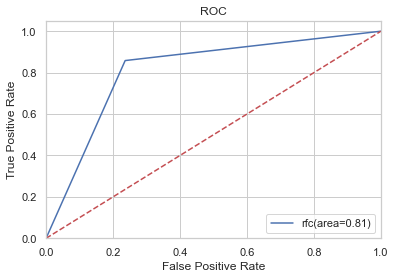

In [164]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rfc_roc_auc=roc_auc_score(y_test, best_model.predict(x_test))
fpr, tpr,thresholds=roc_curve(y_test,best_model.predict(x_test))
plt.figure
plt.plot(fpr,tpr, label="rfc(area=%0.2f)" % rfc_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.savefig("rfc_ROC")
plt.show()

In [ ]:
#81 percent of the area is under the line